In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Pumpkin_Seeds_Dataset.xlsx')

In [ ]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [ ]:
df.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

PREPROCESSING

In [ ]:
nan_in_columns = X.isna().any()

# Display columns with NaN values
print("Columns with NaN values:")
print(nan_in_columns[nan_in_columns].index)

Columns with NaN values:
Index([], dtype='object')


In [ ]:
# Assuming 'df' is your DataFrame
df_cleaned = df.dropna()

# Display the DataFrame after removing rows with NaN values
print(df_cleaned)

In [ ]:
nan_in_columns = df_cleaned.isna().any()

# Display columns with NaN values
print("Columns with NaN values:")
print(nan_in_columns[nan_in_columns].index)

Columns with NaN values:
Index([], dtype='object')


In [ ]:
le = LabelEncoder()
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy['Class'] = le.fit_transform(df_cleaned_copy['Class'])

In [ ]:
# tampilkan jadi array
train = df_cleaned_copy.values

In [ ]:
print(train)

[[5.627600e+04 8.882420e+02 3.261485e+02 ... 1.480900e+00 8.207000e-01
  0.000000e+00]
 [7.663100e+04 1.068146e+03 4.171932e+02 ... 1.781100e+00 7.487000e-01
  0.000000e+00]
 [7.162300e+04 1.082987e+03 4.358328e+02 ... 2.065100e+00 6.929000e-01
  0.000000e+00]
 ...
 [8.799400e+04 1.210314e+03 5.072200e+02 ... 2.282800e+00 6.599000e-01
  1.000000e+00]
 [8.001100e+04 1.182947e+03 5.019065e+02 ... 2.451300e+00 6.359000e-01
  1.000000e+00]
 [8.493400e+04 1.159933e+03 4.628951e+02 ... 1.973500e+00 7.104000e-01
  1.000000e+00]]


Pisahkan antara fitur dan terget

In [ ]:
X = df_cleaned_copy.iloc[:, :-1] #ambil semua kolom kecuali kolom terakhir
y = df_cleaned_copy.iloc[:, -1] #ambil semua baris hanya kolom terakhir


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PENGUJIAN METRIKS

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", random_state = 42, min_samples_split=10)

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
train_score = dt.score(X_train, y_train)

dt_predict = dt.predict(X_test)
test_score = accuracy_score(y_test, dt_predict)

info_train = 'Train accuracy: {:.2f} %'.format(100 * train_score)
info_test = 'Test accuracy:  {:.2f} %'.format(100 * test_score)

print(info_train)
print(info_test)

Train accuracy: 96.20 %
Test accuracy:  87.20 %


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y_test, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_test * 100, y_pred * 100) * 100)]

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifiergini = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth=5 )
classifiergini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
classifierEnt = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=5)
classifierEnt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

The Training Accuracy of the algorithm is  0.899
The Testing Accuracy of the algorithm is  0.892


[89.9, 89.2]

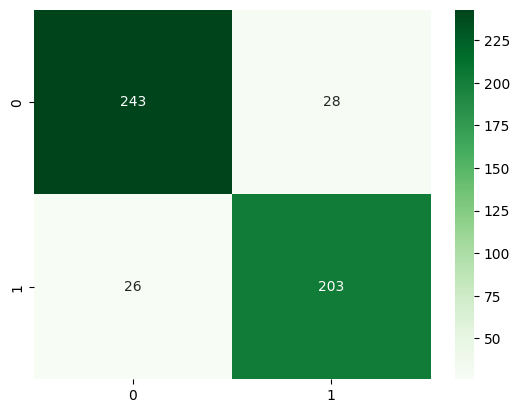

In [ ]:
model_evaluation(classifiergini)

The Training Accuracy of the algorithm is  0.898
The Testing Accuracy of the algorithm is  0.896


[89.8, 89.60000000000001]

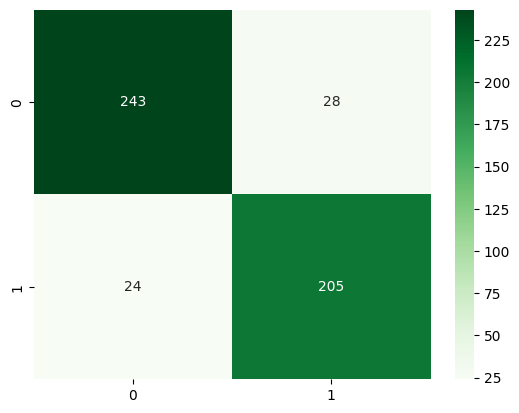

In [ ]:
model_evaluation(classifierEnt)